In [ ]:
    
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv('dataset.csv')

In [ ]:
df.sample(10)   

,labels,text
4668,en,Fits perfeclty in my 2002 525i BMW . It looks ...
5536,hi,हाँ मुझे पता नहीं है कि आप सोचते हैं कि आप सोच...
5646,en,Not the greatest at keeping product the freshe...
6674,hi,मुझे लगता है कि वह इससे बेहतर हो जाएगा जैसे वह...
4995,hi,और उह अगर मुझे लगता है कि मुझे नियंत ् रक या उ...
3516,hi,ग ् रोव में palmera इम ् पीरियल और कई अन ् य प...
3903,en,Great back cushion support for my car seat! Go...
697,hi,श ् नोर ् केलिन ् ग और त ् वचा डाइविंग विशेष र...
5568,hi,क ् या आपने इनमें से किसी भी गेम को देखा है
5671,hi,"और बहुत से लोग जो उस क ् षेत ् र से आए हैं , श..."


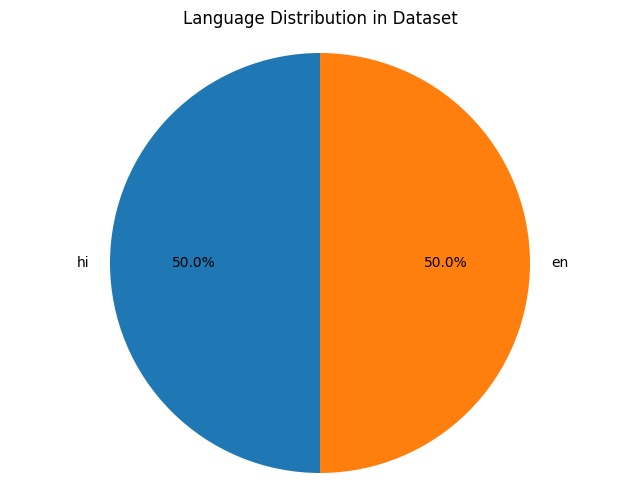

In [ ]:
# Count the distribution of labels
label_counts = df['labels'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Language Distribution in Dataset')
plt.axis('equal')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix


In [6]:

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['labels'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

In [7]:
model = LogisticRegression()
model.fit(X_train_vectors, y_train)
accuracy = model.score(X_test_vectors, y_test)

In [11]:
print("Model Accuracy:", accuracy)
y_pred = model.predict(X_test_vectors)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 0.9978571428571429
              precision    recall  f1-score   support

          en       1.00      1.00      1.00       694
          hi       1.00      1.00      1.00       706

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400

[[691   3]
 [  0 706]]


In [13]:
user_input = input("Enter text to identify language: ")
user_input_vector = vectorizer.transform([user_input])
predicted_language = model.predict(user_input_vector)[0]
print(f"\nDetected Language: {predicted_language}")
print(f"Text: {user_input}")


Detected Language: hi
Text: गूगल इनपुट उपकरण को ऑनलाइन आज़माएं
